# 11.2 COOPERATIVE BINDING DATA

Use this notebook to store your work for this problem.

## (a) Fit by eye

In [2]:
import numpy as np
import matplotlib.pyplot as plt

The Concentration array = [1.16e-06 1.61e-06 2.01e-06 2.46e-06 2.92e-06 3.31e-06 3.71e-06 4.16e-06
 4.95e-06 5.40e-06 5.85e-06 6.30e-06 6.70e-06 7.15e-06 7.66e-06 8.05e-06
 8.50e-06 9.01e-06 9.40e-06 9.86e-06 1.03e-05 1.08e-05 1.12e-05 1.17e-05
 1.21e-05 1.25e-05 1.30e-05 1.35e-05 1.39e-05 1.47e-05 1.56e-05 1.66e-05
 1.75e-05 1.83e-05 1.91e-05 2.00e-05 2.09e-05 2.18e-05 2.26e-05 2.35e-05
 2.45e-05 2.52e-05 2.61e-05 2.71e-05]

The Probability (Unbound) array = [0.9874  0.98182 0.97624 0.9679  0.9568  0.9402  0.92085 0.90149 0.8545
 0.8186  0.78    0.7358  0.6972  0.653   0.6061  0.5565  0.5206  0.4792
 0.4378  0.4019  0.3687  0.3411  0.3108  0.2886  0.261   0.2416  0.2223
 0.2029  0.1863  0.1586  0.1364  0.1142  0.0975  0.0809  0.0725  0.064
 0.0529  0.0472  0.0416  0.0469  0.0302  0.0329  0.0327  0.0298 ]


Text(0, 0.5, 'Probability (Unbound)')

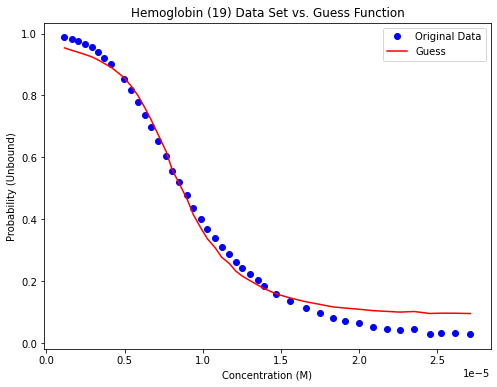

In [88]:
# Importing the data set "hemoglobin"
data = np.loadtxt("hemoglobin.csv", delimiter=',')
#print(data)

# Put each column into a separate array.
N = np.size(data, 0)
Conc = data[0:N:1, 0] # Concentration (M)
P = data[0:N:1, 1]    # Probability (unbound)

print("The Concentration array = {}".format(Conc))
print('\n'+"The Probability (Unbound) array = {}".format(P))

# Creating data fit function (Eq. 11.9, 11.10, or generalized)
# Guess a good function with good values for Kd and n (when Kd = beta_off / k_on)
beta_off = 0.08
k_on = 30
n = 0.4
Kd = beta_off/k_on
C_bar = (Conc**P)/Kd
p = 1/(1+C_bar**n)

# Generating a plot to help estimate function above
plt.figure(figsize=(8,6))
#plt.semilogx(Conc, P, 'ro')
#plt.semilogy(Conc, P, 'ro')
#plt.loglog(Conc, P, 'ro')
plt.plot(Conc, P, 'bo', label='Original Data')
plt.plot(Conc, p, 'r-', label='Guess')
plt.legend()
plt.title('Hemoglobin (19) Data Set vs. Guess Function')
plt.xlabel('Concentration (M)')
plt.ylabel('Probability (Unbound)')

## (b) Least-squares fit

[1.16e-06 1.61e-06 2.01e-06 2.46e-06 2.92e-06 3.31e-06 3.71e-06 4.16e-06
 4.95e-06 5.40e-06 5.85e-06 6.30e-06 6.70e-06 7.15e-06 7.66e-06 8.05e-06
 8.50e-06 9.01e-06 9.40e-06 9.86e-06 1.03e-05 1.08e-05 1.12e-05 1.17e-05
 1.21e-05 1.25e-05 1.30e-05 1.35e-05 1.39e-05 1.47e-05 1.56e-05 1.66e-05
 1.75e-05 1.83e-05 1.91e-05 2.00e-05 2.09e-05 2.18e-05 2.26e-05 2.35e-05
 2.45e-05 2.52e-05 2.61e-05 2.71e-05] alpha=1.1942705322118061, beta=-112767.44712560657


Text(0.5, 1.0, 'Comparison of Hemoglobin Data (19) with Guess and Least Square Fit Models')

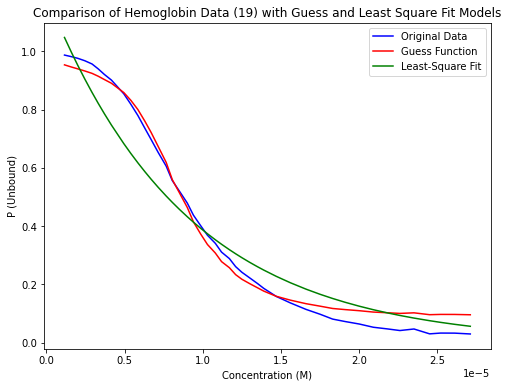

In [95]:
# Generating the Least-Squares Fit Model
A = np.vstack([Conc, np.ones(len(Conc))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(p), rcond = None)[0]
alpha = np.exp(log_alpha)
fit = alpha*np.exp(beta*Conc)
print(Conc, 'alpha={}, beta={}'.format(alpha,beta))

# Generating a plot of the given data set and assumed function (f)
plt.figure(figsize=(8,6))
plt.plot(Conc, P, label='Original Data', color='blue')
plt.plot(Conc, p, label='Guess Function', color='red')
plt.plot(Conc, fit, label='Least-Square Fit', color='green')
plt.legend()
plt.xlabel('Concentration (M)')
plt.ylabel('P (Unbound)')
plt.title('Comparison of Hemoglobin Data (19) with Guess and Least Square Fit Models')